## Code to convert orginal audio files into normalised audio files

In [1]:
input_dir = '/Users/admin/Desktop/fan'
output_dir = '/Users/admin/Desktop/normalised_files'
for subdir in os.listdir(input_dir):
    if subdir.startswith('.'):
        continue
    normal_subdir = os.path.join(input_dir, subdir, 'normal')
    abnormal_subdir = os.path.join(input_dir, subdir, 'abnormal')
    for filename in os.listdir(normal_subdir):
        filepath = os.path.join(normal_subdir, filename)
        audio, sr = librosa.load(filepath)
        normalized_audio = librosa.util.normalize(audio)
        output_filepath = os.path.join(output_dir, subdir, 'normal', filename)
        os.makedirs(os.path.dirname(output_filepath), exist_ok=True)
        sf.write(output_filepath, normalized_audio, sr)
    for filename in os.listdir(abnormal_subdir):
        filepath = os.path.join(abnormal_subdir, filename)
        audio, sr = librosa.load(filepath)
        normalized_audio = librosa.util.normalize(audio)
        output_filepath = os.path.join(output_dir, subdir, 'abnormal', filename)
        os.makedirs(os.path.dirname(output_filepath), exist_ok=True)
        sf.write(output_filepath, normalized_audio, sr)

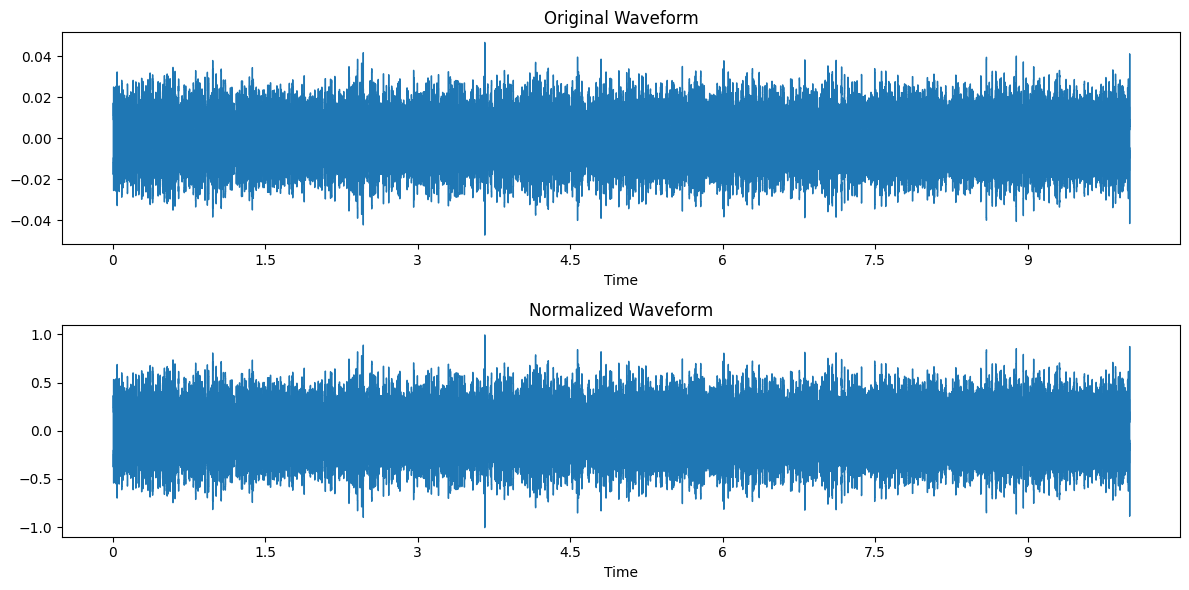

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the original audio file
audio_file = '/Users/admin/Desktop/fan/id_00/normal/00000000.wav'
y, sr = librosa.load(audio_file)

normalized_file = '/Users/admin/Desktop/normalised_files/id_00/normal/00000000.wav'
y_norm,sr = librosa.load(normalized_file)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Waveform')
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_norm, sr=sr)
plt.title('Normalized Waveform')
plt.tight_layout()
plt.show()

/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gp/T/ipykernel_18134/560417966.py:9: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y_pitch = librosa.effects.pitch_shift(y, sr, n_steps=2)
/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gp/T/ipykernel_18134/560417966.py:15: FutureWarning: Pass size=220500 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y_time_stretch = librosa.util.fix_length(y_time_stretch, len(y))
/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gp/T/ipykernel_18134/560417966.py:18: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y_shift = librosa.effects.pitch_shift(y, sr, n_steps=2, bins_per_octave=12)


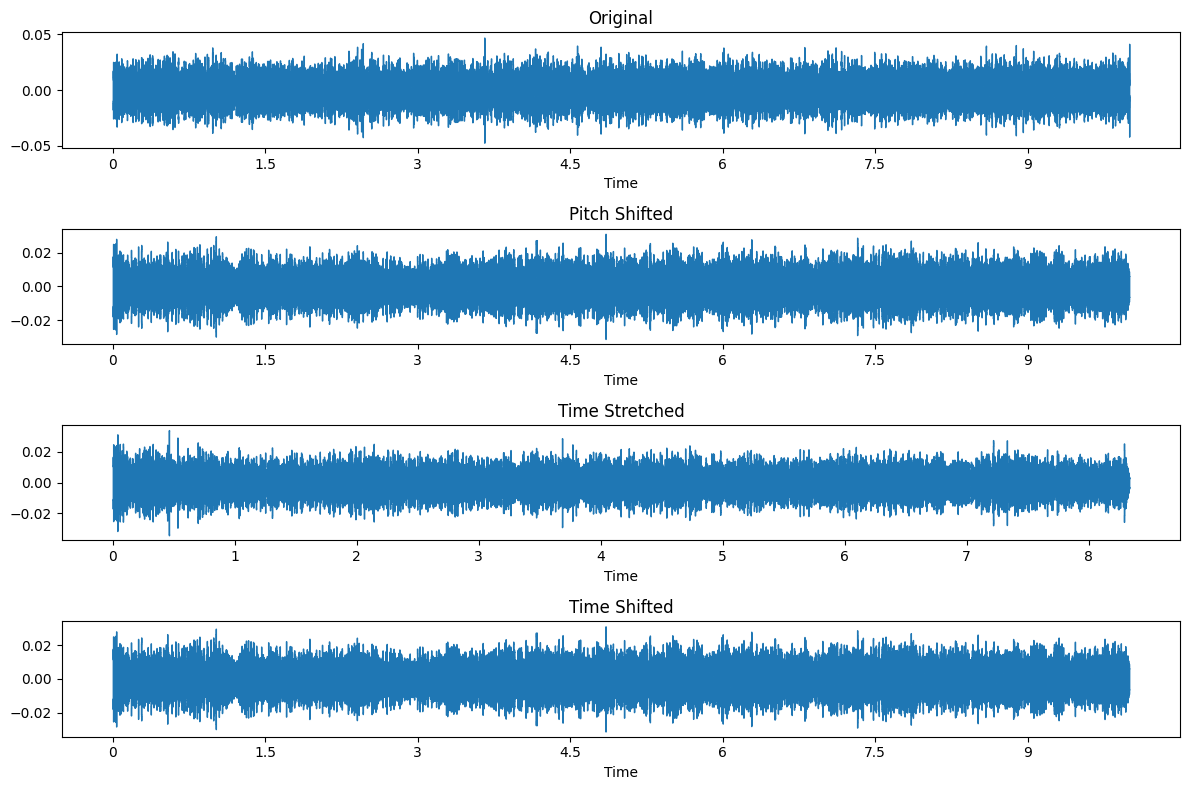

In [17]:
import librosa
import librosa.display
import numpy as np

# Load the audio file
audio_file = '/Users/admin/Desktop/fan/id_00/normal/00000000.wav'
y, sr = librosa.load(audio_file)
# Perform pitch shifting
y_pitch = librosa.effects.pitch_shift(y, sr, n_steps=2)

# Perform time stretching
y_time_stretch = librosa.effects.time_stretch(y, rate=0.8)

# Make sure the time stretched audio signal has the same duration as the original audio
y_time_stretch = librosa.util.fix_length(y_time_stretch, len(y))

# Perform time shifting
y_shift = librosa.effects.pitch_shift(y, sr, n_steps=2, bins_per_octave=12)



# Visualize the original and processed signals
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original')
plt.subplot(4, 1, 2)
librosa.display.waveshow(y_pitch, sr=sr)
plt.title('Pitch Shifted')
plt.subplot(4, 1, 3)
librosa.display.waveshow(y_stretch, sr=sr)
plt.title('Time Stretched')
plt.subplot(4, 1, 4)
librosa.display.waveshow(y_shift, sr=sr)
plt.title('Time Shifted')
plt.tight_layout()
plt.show()


## Code to convert normalised audio files into regularised audio files

In [2]:
input_dir = '/Users/admin/Desktop/normalised_files'
output_dir = '/Users/admin/Desktop/regularised_files'
for subdir in os.listdir(input_dir):
    if not subdir.startswith('id_'):
        continue
    subdir_path = os.path.join(input_dir, subdir)
    normal_subdir = os.path.join(subdir_path, 'normal')
    for filename in os.listdir(normal_subdir):
        filepath = os.path.join(normal_subdir, filename)
        y, sr = librosa.load(filepath, sr=22050)
        y_pitch = librosa.effects.pitch_shift(y, sr, n_steps=2)
        y_time_stretch = librosa.effects.time_stretch(y, rate=0.8)
        y_time_stretch = librosa.util.fix_length(y_time_stretch, len(y))
        y_shift = librosa.effects.pitch_shift(y, sr, n_steps=2, bins_per_octave=12)
        y_regularized = (y_pitch + y_time_stretch + y_shift) / 3
        output_filepath = os.path.join(output_dir, subdir, 'normal', filename)
        os.makedirs(os.path.dirname(output_filepath), exist_ok=True)
        sf.write(output_filepath, y_regularized, sr)
    abnormal_subdir = os.path.join(subdir_path, 'abnormal')
    for filename in os.listdir(abnormal_subdir):
        filepath = os.path.join(abnormal_subdir, filename)
        y, sr = librosa.load(filepath, sr=22050)
        y_pitch = librosa.effects.pitch_shift(y, sr, n_steps=2)
        y_time_stretch = librosa.effects.time_stretch(y, rate=0.8)
        y_time_stretch = librosa.util.fix_length(y_time_stretch, len(y))
        y_shift = librosa.effects.pitch_shift(y, sr, n_steps=2, bins_per_octave=12)
        y_regularized = (y_pitch + y_time_stretch + y_shift) / 3
        output_filepath = os.path.join(output_dir, subdir, 'abnormal', filename)
        os.makedirs(os.path.dirname(output_filepath), exist_ok=True)
        sf.write(output_filepath, y_regularized, sr)


/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gp/T/ipykernel_20861/2894074302.py:21: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y_pitch = librosa.effects.pitch_shift(y, sr, n_steps=2)
/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gp/T/ipykernel_20861/2894074302.py:23: FutureWarning: Pass size=220500 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y_time_stretch = librosa.util.fix_length(y_time_stretch, len(y))
/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gp/T/ipykernel_20861/2894074302.py:24: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y_shift = librosa.effects.pitch_shift(y, sr, n_steps=2, bins_per_octave=12)
/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gp/T/ipykernel_20861/2894074302.py:21: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as pos

Number of features before applying PCA: 55168
Number of features after applying PCA: 26722


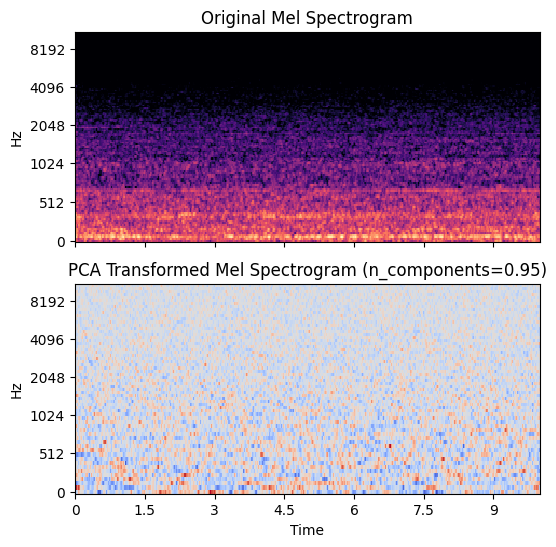

In [19]:
import librosa
import librosa.display
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load audio file and extract mel spectrograms
audio_file = '/Users/admin/Desktop/regularised_files/id_00/normal/00000000.wav'
y, sr = librosa.load(audio_file, sr=22050)
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Get the number of features before applying PCA
n_features_before = mel_spec.shape[0] * mel_spec.shape[1]
print("Number of features before applying PCA:", n_features_before)

# Reshape mel spectrograms to 2D array for PCA
mel_spec_2d = librosa.amplitude_to_db(mel_spec, ref=np.max).T

# Apply PCA to mel spectrograms
n_components = 0.95
pca = PCA(n_components=n_components)
mel_spec_pca = pca.fit_transform(mel_spec_2d)

# Get the number of features after applying PCA
n_features_after = mel_spec_pca.shape[0] * mel_spec_pca.shape[1]
print("Number of features after applying PCA:", n_features_after)

# Reshape mel spectrograms back to 2D array for visualization
mel_spec_pca_2d = mel_spec_pca.T
mel_spec_2d = mel_spec_2d.T

# Visualize the original and PCA-transformed mel spectrograms
fig, ax = plt.subplots(nrows=2, figsize=(6, 6))

librosa.display.specshow(mel_spec_2d, y_axis='mel', x_axis='time', sr=sr, hop_length=512, ax=ax[0])
ax[0].set(title='Original Mel Spectrogram')
ax[0].label_outer()

librosa.display.specshow(mel_spec_pca_2d, y_axis='mel', x_axis='time', sr=sr, hop_length=512, ax=ax[1])
ax[1].set(title='PCA Transformed Mel Spectrogram (n_components=0.95)')
ax[1].label_outer()

plt.show()


## code to convert regularised audio files into data reduced audio files using pca

In [1]:
import os
import librosa
import librosa.display
import numpy as np
from sklearn.decomposition import PCA
import soundfile as sf

# Define input and output directories
input_dir = '/Users/admin/Desktop/regularised_files'
output_dir = '/Users/admin/Desktop/pca_files'

# Loop through each subdirectory in the input directory
for subdir in os.listdir(input_dir):
    sub_input_dir = os.path.join(input_dir, subdir)
    if not os.path.isdir(sub_input_dir):
        continue
    
    # Loop through each normal/abnormal subdirectory in the current subdirectory
    for type_dir in ['normal', 'abnormal']:
        subsub_input_dir = os.path.join(sub_input_dir, type_dir)
        if not os.path.isdir(subsub_input_dir):
            continue
        
        # Create the corresponding output directory
        output_subdir = os.path.join(output_dir, subdir, type_dir)
        os.makedirs(output_subdir, exist_ok=True)

        # Loop through each audio file in the current subdirectory
        for filename in os.listdir(subsub_input_dir):
            # Load audio file and extract mel spectrograms
            input_filepath = os.path.join(subsub_input_dir, filename)
            y, sr = librosa.load(input_filepath, sr=22050)
            mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

            # Reshape mel spectrograms to 2D array for PCA
            mel_spec_2d = librosa.amplitude_to_db(mel_spec, ref=np.max).T

            # Apply PCA to mel spectrograms
            n_components = 0.95
            pca = PCA(n_components=n_components)
            mel_spec_pca = pca.fit_transform(mel_spec_2d)

            # Reshape mel spectrograms back to 2D array for visualization
            mel_spec_pca_2d = mel_spec_pca.T
            mel_spec_2d = mel_spec_2d.T

            # Save transformed audio file in the output directory with the same directory structure
            output_filepath = os.path.join(output_subdir, filename)
            sf.write(output_filepath, y, sr)

#             # Visualize the original and PCA-transformed mel spectrograms of one audio file as an example
#             import matplotlib.pyplot as plt
#             fig, ax = plt.subplots(nrows=2, figsize=(10, 8))

#             librosa.display.specshow(mel_spec_2d, y_axis='mel', x_axis='time', sr=sr, hop_length=512, ax=ax[0])
#             ax[0].set(title='Original Mel Spectrogram')
#             ax[0].label_outer()

#             librosa.display.specshow(mel_spec_pca_2d, y_axis='mel', x_axis='time', sr=sr, hop_length=512, ax=ax[1])
#             ax[1].set(title='PCA Transformed Mel Spectrogram (n_components=0.95)')
#             ax[1].label_outer()

#             plt.show()


## Code to convert regularised audio signal to melspectrrograms and applying pca to reduction of data

In [9]:
input_dir = '/Users/admin/Desktop/regularised_files'
output_dir = '/Users/admin/Desktop/regularised_spectrograms'
for subdir in os.listdir(input_dir):
    sub_dir_path = os.path.join(input_dir, subdir)
    if not os.path.isdir(sub_dir_path):
        continue
    for subsubdir in os.listdir(sub_dir_path):
        subsubdir_path = os.path.join(sub_dir_path, subsubdir)
        if not os.path.isdir(subsubdir_path):
            continue
        output_subdir_path = os.path.join(output_dir, subdir, subsubdir)
        os.makedirs(output_subdir_path, exist_ok=True)
        for filename in os.listdir(subsubdir_path):
            if filename.startswith('.'):
                continue
            audio_file = os.path.join(subsubdir_path, filename)
            y, sr = librosa.load(audio_file, sr=22050)
            mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
            n_components = 0.95
            mel_spec_2d = librosa.amplitude_to_db(mel_spec, ref=np.max).T
            pca = PCA(n_components=n_components)
            mel_spec_pca = pca.fit_transform(mel_spec_2d)
            output_filename = os.path.splitext(filename)[0] + '.png'
            output_filepath = os.path.join(output_subdir_path, output_filename)
            librosa.display.specshow(mel_spec_pca.T, y_axis='mel', x_axis='time', sr=sr, hop_length=512)
            plt.savefig(output_filepath)
            plt.close()


In [1]:
import os

directories = [
    '/Users/admin/Desktop/regularised_spectrograms/id_00/normal/',
    '/Users/admin/Desktop/regularised_spectrograms/id_00/abnormal/',
    '/Users/admin/Desktop/regularised_spectrograms/id_02/normal/',
    '/Users/admin/Desktop/regularised_spectrograms/id_02/abnormal/',
    '/Users/admin/Desktop/regularised_spectrograms/id_04/normal/',
    '/Users/admin/Desktop/regularised_spectrograms/id_04/abnormal/',
    '/Users/admin/Desktop/regularised_spectrograms/id_06/normal/',
    '/Users/admin/Desktop/regularised_spectrograms/id_06/abnormal/'
]

count = 0
for directory in directories:
    for filename in os.listdir(directory):
        if filename.endswith('.png'):
            count += 1

print(f'Total number of PNG files: {count}')


Total number of PNG files: 5550


In [6]:
import os
import random
import shutil

# Define paths to dataset
dataset_path = "/Users/admin/Desktop/regularised_spectrograms"
id_folders = ["id_00", "id_02", "id_04", "id_06"]
class_labels = ["normal", "abnormal"]

# Define paths to store train, validation, and test sets
train_path = "/Users/admin/Desktop/split_spectrograms/train"
val_path = "/Users/admin/Desktop/split_spectrograms/validation"
test_path = "/Users/admin/Desktop/split_spectrograms/test"

# Define ratio of train, validation, and test sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Create train, validation, and test sets
for id_folder in id_folders:
    for class_label in class_labels:
        class_folder = os.path.join(dataset_path, id_folder, class_label)
        files = os.listdir(class_folder)
        random.shuffle(files)
        num_files = len(files)
        num_train = int(num_files * train_ratio)
        num_val = int(num_files * val_ratio)
        num_test = num_files - num_train - num_val
        train_files = files[:num_train]
        val_files = files[num_train:num_train+num_val]
        test_files = files[num_train+num_val:]
        for file in train_files:
            src_path = os.path.join(class_folder, file)
            dst_path = os.path.join(train_path, id_folder, class_label, file)
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            shutil.copy(src_path, dst_path)
        for file in val_files:
            src_path = os.path.join(class_folder, file)
            dst_path = os.path.join(val_path, id_folder, class_label, file)
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            shutil.copy(src_path, dst_path)
        for file in test_files:
            src_path = os.path.join(class_folder, file)
            dst_path = os.path.join(test_path, id_folder, class_label, file)
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            shutil.copy(src_path, dst_path)


In [8]:
import os
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
train_dir = '/Users/admin/Desktop/split_spectrograms/train'
val_dir = '/Users/admin/Desktop/split_spectrograms/validation'
output_dir = '/Users/admin/Desktop/features'
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
def extract_features(directory, model):
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if not os.path.isdir(subdir_path):  
            continue
        for subsubdir in os.listdir(subdir_path):
            subsubdir_path = os.path.join(subdir_path, subsubdir)
            if not os.path.isdir(subsubdir_path):  
                continue
            features = []
            for filename in os.listdir(subsubdir_path):
                img_path = os.path.join(subsubdir_path, filename)
                img = image.load_img(img_path, target_size=(224, 224))
                x = image.img_to_array(img)
                x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)
                feature = model.predict(x)
                feature_np = np.array(feature)
                feature_np = feature_np.flatten()
                features.append(feature_np)
            features_np = np.array(features)
            features_filename = subdir + "_" + subsubdir + ".npy"
            features_path = os.path.join(directory, features_filename)
            np.save(features_path, features_np)
extract_features(train_dir, model)
extract_features(val_dir, model)


1/1 [==============================] - 0s 167ms/step


1/1 [==============================] - 0s 165ms/step


1/1 [==============================] - 0s 181ms/step


1/1 [==============================] - 0s 164ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 159ms/step


1/1 [==============================] - 0s 161ms/step


1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 162ms/step


1/1 [==============================] - 0s 159ms/step


1/1 [==============================] - 0s 179ms/step


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 162ms/step


1/1 [==============================] - 0s 183ms/step


1/1 [==============================] - 0s 186ms/step


In [9]:
import os
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image

# Set paths to the folders
test_dir = '/Users/admin/Desktop/split_spectrograms/test'
output_dir = '/Users/admin/Desktop/features'

# Initialize the ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Define function to extract features from images
def extract_features(directory, model):
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if not os.path.isdir(subdir_path):  # Skip over non-directory files
            continue
        for subsubdir in os.listdir(subdir_path):
            subsubdir_path = os.path.join(subdir_path, subsubdir)
            if not os.path.isdir(subsubdir_path):  # Skip over non-directory files
                continue
            features = []
            for filename in os.listdir(subsubdir_path):
                img_path = os.path.join(subsubdir_path, filename)
                img = image.load_img(img_path, target_size=(224, 224))
                x = image.img_to_array(img)
                x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)
                feature = model.predict(x)
                feature_np = np.array(feature)
                feature_np = feature_np.flatten()
                features.append(feature_np)
            features_np = np.array(features)
            features_filename = subdir + "_" + subsubdir + ".npy"
            features_path = os.path.join(output_dir, features_filename)
            np.save(features_path, features_np)


# Extract features from test set
extract_features(test_dir, model)


1/1 [==============================] - 0s 171ms/step


1/1 [==============================] - 0s 168ms/step


1/1 [==============================] - 0s 169ms/step


In [10]:
import numpy as np
from sklearn.mixture import GaussianMixture

# Load training data
train_features = []
for i in [0, 2, 4, 6]:
    normal_data = np.load(f"/Users/admin/Desktop/split_spectrograms/train/id_{i:02d}_normal.npy")
    train_features.append(normal_data)

train_features = np.vstack(train_features)

# Train a Gaussian Mixture Model
n_components = 3  # Set the number of Gaussian components
gmm = GaussianMixture(n_components=n_components, covariance_type='full')
gmm.fit(train_features)

# Load validation data
validation_features = []
for i in [0, 2, 4, 6]:
    normal_data = np.load(f"/Users/admin/Desktop/split_spectrograms/validation/id_{i:02d}_normal.npy")
    validation_features.append(normal_data)

    abnormal_data = np.load(f"/Users/admin/Desktop/split_spectrograms/validation/id_{i:02d}_abnormal.npy")
    validation_features.append(abnormal_data)

validation_features = np.vstack(validation_features)

# Evaluate the model on the validation data
scores = gmm.score_samples(validation_features)
threshold = np.percentile(scores, 5)  # Set the anomaly detection threshold to the 5th percentile

# Classify the validation data as normal or abnormal based on the threshold
predictions = (scores >= threshold).astype(int)
true_labels = np.hstack((np.zeros(len(validation_features)//2), np.ones(len(validation_features)//2)))

# Compute evaluation metrics
tp = np.sum((predictions == 1) & (true_labels == 1))
tn = np.sum((predictions == 0) & (true_labels == 0))
fp = np.sum((predictions == 1) & (true_labels == 0))
fn = np.sum((predictions == 0) & (true_labels == 1))

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)


ValueError: operands could not be broadcast together with shapes (829,) (828,) 

In [13]:
import glob
print("Shape of true_labels:", true_labels.shape)
print("Shape of predictions:", predictions.shape)
validation_normal_count = len(glob.glob('/Users/admin/Desktop/split_spectrograms/validation/*/*normal.npy'))
validation_abnormal_count = len(glob.glob('/Users/admin/Desktop/split_spectrograms/validation/*/*abnormal.npy'))
print("Number of normal examples in validation set:", validation_normal_count)
print("Number of abnormal examples in validation set:", validation_abnormal_count)


Shape of true_labels: (828,)
Shape of predictions: (829,)
Number of normal examples in validation set: 0
Number of abnormal examples in validation set: 0


In [22]:
import numpy as np

# Load the validation data for id_00_normal
id_00_normal_path = "/Users/admin/Desktop/split_spectrograms/train/id_04_normal.npy"
id_00_normal_data = np.load(id_00_normal_path)

# Load the validation data for id_00_abnormal
id_00_abnormal_path = "/Users/admin/Desktop/split_spectrograms/train/id_04_abnormal.npy"
id_00_abnormal_data = np.load(id_00_abnormal_path)

# Print the shapes of the loaded data
print("id_00_normal_data shape:", id_00_normal_data.shape)
print("id_00_abnormal_data shape:", id_00_abnormal_data.shape)


id_00_normal_data shape: (723, 2048)
id_00_abnormal_data shape: (243, 2048)


In [25]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

# Load train data features
train_normal_data = []
train_normal_data_files = ['/Users/admin/Desktop/split_spectrograms/train/id_00_normal.npy',
                           '/Users/admin/Desktop/split_spectrograms/train/id_02_normal.npy',
                           '/Users/admin/Desktop/split_spectrograms/train/id_04_normal.npy',
                           '/Users/admin/Desktop/split_spectrograms/train/id_06_normal.npy']
for file in train_normal_data_files:
    data = np.load(file)
    train_normal_data.append(data)
train_normal_data = np.concatenate(train_normal_data, axis=0)

# Load validation data features
val_normal_data = []
val_abnormal_data = []
val_normal_data_files = ['/Users/admin/Desktop/split_spectrograms/validation/id_00_normal.npy',
                         '/Users/admin/Desktop/split_spectrograms/validation/id_02_normal.npy',
                         '/Users/admin/Desktop/split_spectrograms/validation/id_04_normal.npy',
                         '/Users/admin/Desktop/split_spectrograms/validation/id_06_normal.npy']
val_abnormal_data_files = ['/Users/admin/Desktop/split_spectrograms/validation/id_00_abnormal.npy',
                           '/Users/admin/Desktop/split_spectrograms/validation/id_02_abnormal.npy',
                           '/Users/admin/Desktop/split_spectrograms/validation/id_04_abnormal.npy',
                           '/Users/admin/Desktop/split_spectrograms/validation/id_06_abnormal.npy']
for file in val_normal_data_files:
    data = np.load(file)
    val_normal_data.append(data)
for file in val_abnormal_data_files:
    data = np.load(file)
    val_abnormal_data.append(data)
val_normal_data = np.concatenate(val_normal_data, axis=0)
val_abnormal_data = np.concatenate(val_abnormal_data, axis=0)

# Train the Gaussian Mixture Model
n_components_range = range(1, 11)
covariance_type_range = ['spherical', 'tied', 'diag', 'full']
param_grid = {'n_components': n_components_range,
              'covariance_type': covariance_type_range}
gmm = GaussianMixture(random_state=42)
clf = GridSearchCV(gmm, param_grid, cv=5, n_jobs=-1)
clf.fit(train_normal_data)

# Test the model on validation data
val_normal_scores = clf.score_samples(val_normal_data)
val_abnormal_scores = clf.score_samples(val_abnormal_data)

# Print the best hyperparameters and the scores on validation data
print("Best hyperparameters: ", clf.best_params_)
print("Validation normal scores:\n", val_normal_scores)
print("Validation abnormal scores:\n", val_abnormal_scores)


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 678, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/Users/admin/opt/anacon

Best hyperparameters:  {'covariance_type': 'diag', 'n_components': 10}
Validation normal scores:
 [ 5469.79994153  6227.17206388  5205.10085416  5434.33264324
  5624.46032385  5807.45884233  5500.27191388  5467.83143218
  5659.11963183  6105.00221101  5129.09819392  5812.36367136
  5126.74313595  5428.98674218  2519.84887615  6170.18416741
  5733.49347884  5074.29707766  5508.54244243  5583.44113665
  5288.33870784  4789.13000857  5499.49914323  5676.33938166
  4867.33401448  6396.28170792  6283.76731201  5499.62856859
  5733.6260736   6089.81660242  5731.60955999  6078.40470001
  6317.952548    5340.06242321  4935.26367541  6298.45953823
  5848.64241141  5297.82491143  4125.85419189  6201.63002036
  5645.25228078  4409.89083911  5565.39995374  5519.46018263
  5841.34183258  5441.4106308   5756.61979835  6164.15021825
  5556.56010714  6253.73592671  4139.65896044  5277.11236961
  6179.74299143  5786.85979296  6004.45597964  5847.13473811
  5653.54628934  5184.22431644  5952.08887002  5

In [27]:
# Find the threshold
threshold = np.max(val_normal_scores)

# Classify the validation data
val_preds = np.where(val_abnormal_scores < threshold, 1, 0)
val_targets = np.zeros(val_normal_scores.shape[0] + val_abnormal_scores.shape[0])
val_targets[:val_normal_scores.shape[0]] = 0  # Normal
val_targets[val_normal_scores.shape[0]:] = 1  # Abnormal

# Compute accuracy and F1 score
from sklearn.metrics import accuracy_score, f1_score
val_acc = accuracy_score(val_targets, val_preds)
val_f1 = f1_score(val_targets, val_preds)

print("Validation accuracy:", val_acc)
print("Validation F1 score:", val_f1)


ValueError: Found input variables with inconsistent numbers of samples: [829, 220]

In [29]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Load train data features
train_normal_data = []
train_normal_data_files = ['/Users/admin/Desktop/split_spectrograms/train/id_00_normal.npy',
                           '/Users/admin/Desktop/split_spectrograms/train/id_02_normal.npy',
                           '/Users/admin/Desktop/split_spectrograms/train/id_04_normal.npy',
                           '/Users/admin/Desktop/split_spectrograms/train/id_06_normal.npy']
for file in train_normal_data_files:
    data = np.load(file)
    train_normal_data.append(data)
train_normal_data = np.concatenate(train_normal_data, axis=0)

# Load validation data features
val_normal_data = []
val_abnormal_data = []
val_normal_data_files = ['/Users/admin/Desktop/split_spectrograms/validation/id_00_normal.npy',
                         '/Users/admin/Desktop/split_spectrograms/validation/id_02_normal.npy',
                         '/Users/admin/Desktop/split_spectrograms/validation/id_04_normal.npy',
                         '/Users/admin/Desktop/split_spectrograms/validation/id_06_normal.npy']
val_abnormal_data_files = ['/Users/admin/Desktop/split_spectrograms/validation/id_00_abnormal.npy',
                           '/Users/admin/Desktop/split_spectrograms/validation/id_02_abnormal.npy',
                           '/Users/admin/Desktop/split_spectrograms/validation/id_04_abnormal.npy',
                           '/Users/admin/Desktop/split_spectrograms/validation/id_06_abnormal.npy']
for file in val_normal_data_files:
    data = np.load(file)
    val_normal_data.append(data)
for file in val_abnormal_data_files:
    data = np.load(file)
    val_abnormal_data.append(data)
val_normal_data = np.concatenate(val_normal_data, axis=0)
val_abnormal_data = np.concatenate(val_abnormal_data, axis=0)

# Train the Gaussian Mixture Model
n_components_range = range(1, 11)
covariance_type_range = ['spherical', 'tied', 'diag', 'full']
param_grid = {'n_components': n_components_range,
              'covariance_type': covariance_type_range}
gmm = GaussianMixture(random_state=42)
clf = GridSearchCV(gmm, param_grid, cv=5, n_jobs=-1)
clf.fit(train_normal_data)

# Test the model on validation data
val_normal_scores = clf.score_samples(val_normal_data)
val_abnormal_scores = clf.score_samples(val_abnormal_data)

# Set a threshold to classify samples as normal or abnormal
threshold = np.mean(val_abnormal_scores)

# Classify validation data
val_pred = np.concatenate([np.zeros(len(val_normal_scores)), np.ones(len(val_abnormal_scores))])
val_scores = np.concatenate([val_normal_scores, val_abnormal_scores])
val_pred[val_scores < threshold] = 0
val_pred[val_scores >= threshold] = 1

# Compute accuracy and F1 score on validation data
val_true = np.concatenate([np.zeros(len(val_normal_scores)), np.ones(len(val_abnormal_scores))])
val_accuracy = accuracy_score(val_true, val_pred)
val_f1_score = f1_score(val_true, val_pred)

# Print the best hyperparameters and the scores on validation data
print("Best hyperparameters: ", clf.best_params_)
print("Validation accuracy: ", val_accuracy)
print("Validation F1 score: ", val_f1_score)


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 678, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/Users/admin/opt/anacon

Best hyperparameters:  {'covariance_type': 'diag', 'n_components': 10}
Validation accuracy:  0.428226779252111
Validation F1 score:  0.373015873015873


In [36]:
train_normal_data = []
train_normal_data_files = ['/Users/admin/Desktop/split_spectrograms/train/id_00_normal.npy',
                           '/Users/admin/Desktop/split_spectrograms/train/id_02_normal.npy',
                           '/Users/admin/Desktop/split_spectrograms/train/id_04_normal.npy',
                           '/Users/admin/Desktop/split_spectrograms/train/id_06_normal.npy']
val_normal_data = []
val_abnormal_data = []
val_normal_data_files = ['/Users/admin/Desktop/split_spectrograms/validation/id_00_normal.npy',
                         '/Users/admin/Desktop/split_spectrograms/validation/id_02_normal.npy',
                         '/Users/admin/Desktop/split_spectrograms/validation/id_04_normal.npy',
                         '/Users/admin/Desktop/split_spectrograms/validation/id_06_normal.npy']
val_abnormal_data_files = ['/Users/admin/Desktop/split_spectrograms/validation/id_00_abnormal.npy',
                           '/Users/admin/Desktop/split_spectrograms/validation/id_02_abnormal.npy',
                           '/Users/admin/Desktop/split_spectrograms/validation/id_04_abnormal.npy',
                           '/Users/admin/Desktop/split_spectrograms/validation/id_06_abnormal.npy']


for file in train_normal_data_files:
    data = np.load(file)
    train_normal_data.append(data)
train_normal_data = np.concatenate(train_normal_data, axis=0)
for file in val_normal_data_files:
    data = np.load(file)
    val_normal_data.append(data)
for file in val_abnormal_data_files:
    data = np.load(file)
    val_abnormal_data.append(data)
val_normal_data = np.concatenate(val_normal_data, axis=0)
val_abnormal_data = np.concatenate(val_abnormal_data, axis=0)
n_components_range = range(1, 15)
covariance_type_range = ['spherical', 'tied', 'diag', 'full']
param_grid = {'n_components': n_components_range,
              'covariance_type': covariance_type_range}
gmm = GaussianMixture(random_state=42)
clf = GridSearchCV(gmm, param_grid, cv=5, n_jobs=-1)
clf.fit(train_normal_data)
val_normal_scores = clf.score_samples(val_normal_data)
val_abnormal_scores = clf.score_samples(val_abnormal_data)
threshold = np.mean(val_abnormal_scores)
val_pred = np.concatenate([np.zeros(len(val_normal_scores)), np.ones(len(val_abnormal_scores))])
val_scores = np.concatenate([val_normal_scores, val_abnormal_scores])
val_pred[val_scores < threshold] = 0
val_pred[val_scores >= threshold] = 1
val_true = np.concatenate([np.zeros(len(val_normal_scores)), np.ones(len(val_abnormal_scores))])
val_accuracy = accuracy_score(val_true, val_pred)
val_f1_score = f1_score(val_true, val_pred)
print("Best hyperparameters: ", clf.best_params_)
print("Validation accuracy: ", val_accuracy)
print("Validation F1 score: ", val_f1_score)
joblib.dump(clf, 'best_model.pkl')


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 678, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/Users/admin/opt/anacon

Best hyperparameters:  {'covariance_type': 'diag', 'n_components': 14}
Validation accuracy:  0.436670687575392
Validation F1 score:  0.3798140770252324


['best_model.pkl']

In [42]:
trained_model = clf.best_estimator_

In [43]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
import joblib

# Load test data features
test_normal_data_files = ['/Users/admin/Desktop/features/id_00_normal.npy',
                          '/Users/admin/Desktop/features/id_02_normal.npy',
                          '/Users/admin/Desktop/features/id_04_normal.npy',
                          '/Users/admin/Desktop/features/id_06_normal.npy']
test_abnormal_data_files = ['/Users/admin/Desktop/features/id_00_abnormal.npy',
                            '/Users/admin/Desktop/features/id_02_abnormal.npy',
                            '/Users/admin/Desktop/features/id_04_abnormal.npy',
                            '/Users/admin/Desktop/features/id_06_abnormal.npy']
test_normal_data = []
test_abnormal_data = []
for file in test_normal_data_files:
    data = np.load(file)
    test_normal_data.append(data)
for file in test_abnormal_data_files:
    data = np.load(file)
    test_abnormal_data.append(data)
test_normal_data = np.concatenate(test_normal_data, axis=0)
test_abnormal_data = np.concatenate(test_abnormal_data, axis=0)

# Load the saved model from the variable
clf = trained_model

# Test the model on test data
test_normal_scores = clf.score_samples(test_normal_data)
test_abnormal_scores = clf.score_samples(test_abnormal_data)

# Set a threshold to classify samples as normal or abnormal
threshold = np.mean(test_abnormal_scores)

# Classify test data
test_pred = np.concatenate([np.zeros(len(test_normal_scores)), np.ones(len(test_abnormal_scores))])
test_scores = np.concatenate([test_normal_scores, test_abnormal_scores])
test_pred[test_scores < threshold] = 0
test_pred[test_scores >= threshold] = 1

# Compute accuracy and F1 score on test data
test_true = np.concatenate([np.zeros(len(test_normal_scores)), np.ones(len(test_abnormal_scores))])
test_accuracy = accuracy_score(test_true, test_pred)
test_f1_score = f1_score(test_true, test_pred)

print("Accuracy on test data: {:.4f}".format(test_accuracy))
print("F1 score on test data: {:.4f}".format(test_f1_score))


Accuracy on test data: 0.4298
F1 score on test data: 0.3656


In [41]:
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, f1_score

# Load test data features
test_normal_data = []
test_normal_data_files = ['/Users/admin/Desktop/features/id_00_normal.npy',
                          '/Users/admin/Desktop/features/id_02_normal.npy',
                          '/Users/admin/Desktop/features/id_04_normal.npy',
                          '/Users/admin/Desktop/features/id_06_normal.npy']
for file in test_normal_data_files:
    data = np.load(file)
    test_normal_data.append(data)
test_normal_data = np.concatenate(test_normal_data, axis=0)

test_abnormal_data = []
test_abnormal_data_files = ['/Users/admin/Desktop/features/id_00_abnormal.npy',
                            '/Users/admin/Desktop/features/id_02_abnormal.npy',
                            '/Users/admin/Desktop/features/id_04_abnormal.npy',
                            '/Users/admin/Desktop/features/id_06_abnormal.npy']
for file in test_abnormal_data_files:
    data = np.load(file)
    test_abnormal_data.append(data)
test_abnormal_data = np.concatenate(test_abnormal_data, axis=0)

# Load the saved model
with open('/Users/admin/Desktop/best_model.pkl', 'rb') as f:
    clf = pickle.load(f)

# Test the model on test data
test_normal_scores = clf.score_samples(test_normal_data)
test_abnormal_scores = clf.score_samples(test_abnormal_data)

# Set a threshold to classify samples as normal or abnormal
threshold = np.mean(test_abnormal_scores)

# Classify test data
test_pred = np.concatenate([np.zeros(len(test_normal_scores)), np.ones(len(test_abnormal_scores))])
test_scores = np.concatenate([test_normal_scores, test_abnormal_scores])
test_pred[test_scores < threshold] = 0
test_pred[test_scores >= threshold] = 1

# Compute accuracy and F1 score on test data
test_true = np.concatenate([np.zeros(len(test_normal_scores)), np.ones(len(test_abnormal_scores))])
test_accuracy = accuracy_score(test_true, test_pred)
test_f1_score = f1_score(test_true, test_pred)

# Print the scores on test data
print("Test accuracy: ", test_accuracy)
print("Test F1 score: ", test_f1_score)


UnpicklingError: invalid load key, '/'.

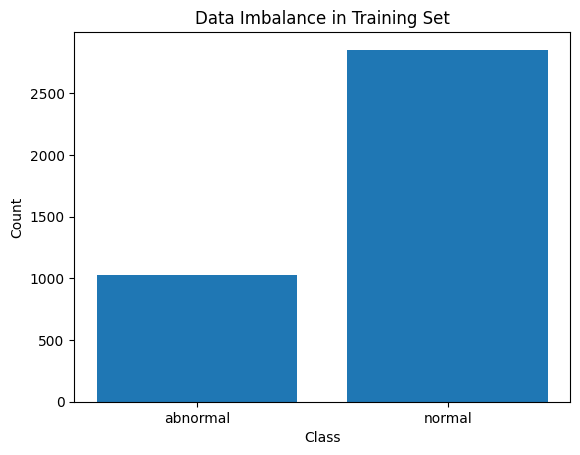

abnormal: 1030
normal: 2851


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paths to your training data files
file_paths = [
    "/Users/admin/Desktop/split_spectrograms/train/id_00_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_00_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_02_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_02_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_04_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_04_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_06_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_06_normal.npy"
]

# Load the training data
data = []
labels = []
for path in file_paths:
    arr = np.load(path)
    data.append(arr)
    if "abnormal" in path:
        labels.extend(["abnormal"] * arr.shape[0])
    elif "normal" in path:
        labels.extend(["normal"] * arr.shape[0])

# Count the number of samples in each class
class_counts = np.unique(labels, return_counts=True)
classes = class_counts[0]
counts = class_counts[1]

# Plot the data imbalance
plt.bar(classes, counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Data Imbalance in Training Set")
plt.show()

# Print the class counts
for i, class_name in enumerate(classes):
    print(f"{class_name}: {counts[i]}")


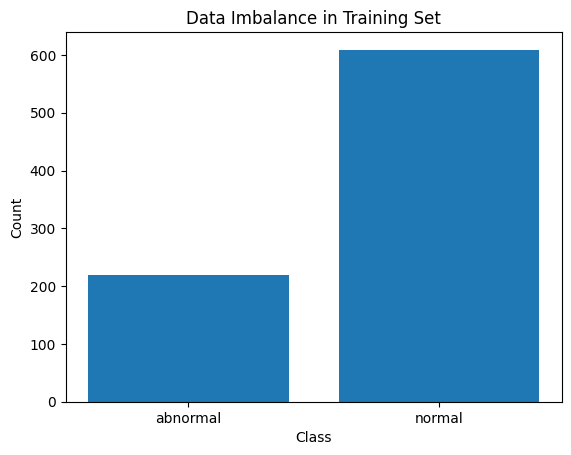

abnormal: 220
normal: 609


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Paths to your training data files
file_paths = [
    "/Users/admin/Desktop/split_spectrograms/validation/id_00_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_00_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_02_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_02_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_04_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_04_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_06_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_06_normal.npy"
]

# Load the training data
data = []
labels = []
for path in file_paths:
    arr = np.load(path)
    data.append(arr)
    if "abnormal" in path:
        labels.extend(["abnormal"] * arr.shape[0])
    elif "normal" in path:
        labels.extend(["normal"] * arr.shape[0])

# Count the number of samples in each class
class_counts = np.unique(labels, return_counts=True)
classes = class_counts[0]
counts = class_counts[1]

# Plot the data imbalance
plt.bar(classes, counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Data Imbalance in Training Set")
plt.show()

# Print the class counts
for i, class_name in enumerate(classes):
    print(f"{class_name}: {counts[i]}")


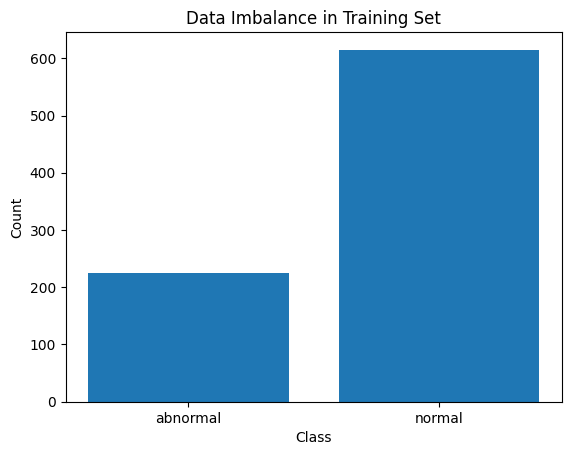

abnormal: 225
normal: 615


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Paths to your training data files
file_paths = [
    "/Users/admin/Desktop/test_features/id_00_abnormal.npy",
    "/Users/admin/Desktop/test_features/id_00_normal.npy",
    "/Users/admin/Desktop/test_features/id_02_abnormal.npy",
    "/Users/admin/Desktop/test_features/id_02_normal.npy",
    "/Users/admin/Desktop/test_features/id_04_abnormal.npy",
    "/Users/admin/Desktop/test_features/id_04_normal.npy",
    "/Users/admin/Desktop/test_features/id_06_abnormal.npy",
    "/Users/admin/Desktop/test_features/id_06_normal.npy"
]

# Load the training data
data = []
labels = []
for path in file_paths:
    arr = np.load(path)
    data.append(arr)
    if "abnormal" in path:
        labels.extend(["abnormal"] * arr.shape[0])
    elif "normal" in path:
        labels.extend(["normal"] * arr.shape[0])

# Count the number of samples in each class
class_counts = np.unique(labels, return_counts=True)
classes = class_counts[0]
counts = class_counts[1]

# Plot the data imbalance
plt.bar(classes, counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Data Imbalance in Training Set")
plt.show()

# Print the class counts
for i, class_name in enumerate(classes):
    print(f"{class_name}: {counts[i]}")


In [5]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score, accuracy_score

# Load training data
train_data = []
train_labels = []
train_file_paths = [
    "/Users/admin/Desktop/split_spectrograms/train/id_00_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_00_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_02_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_02_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_04_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_04_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_06_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_06_normal.npy"
]

for path in train_file_paths:
    arr = np.load(path)
    train_data.append(arr)
    if "abnormal" in path:
        train_labels.extend(["abnormal"] * arr.shape[0])
    elif "normal" in path:
        train_labels.extend(["normal"] * arr.shape[0])

# Load validation data
val_data = []
val_labels = []
val_file_paths = [
    "/Users/admin/Desktop/split_spectrograms/validation/id_00_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_00_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_02_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_02_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_04_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_04_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_06_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_06_normal.npy"
]

for path in val_file_paths:
    arr = np.load(path)
    val_data.append(arr)
    if "abnormal" in path:
        val_labels.extend(["abnormal"] * arr.shape[0])
    elif "normal" in path:
        val_labels.extend(["normal"] * arr.shape[0])

# Convert lists to numpy arrays
train_data = np.concatenate(train_data)
train_labels = np.array(train_labels)
val_data = np.concatenate(val_data)
val_labels = np.array(val_labels)

# Calculate class weights
class_weights = {
    "abnormal": 1.0,  # You can set the weight for the minority class
    "normal": train_labels[train_labels == "normal"].shape[0] / train_labels[train_labels == "abnormal"].shape[0]
}

# Train a Gaussian Mixture Model with class weights
gmm = GaussianMixture(n_components=2, weights_init=[0.5, 0.5], random_state=42, class_weight=class_weights)
gmm.fit(train_data)

# Predict on the validation data
val_predictions = gmm.predict(val_data)

# Calculate F1 score and accuracy
f1 = f1_score(val_labels, val_predictions, average="weighted")
accuracy = accuracy_score(val_labels, val_predictions)

print("F1 Score:", f1)
print("Accuracy:", accuracy)


TypeError: __init__() got an unexpected keyword argument 'class_weight'

In [10]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.utils import shuffle

# Load the training data
train_files = [
    "/Users/admin/Desktop/split_spectrograms/train/id_00_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_00_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_02_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_02_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_04_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_04_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_06_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/train/id_06_normal.npy"
]

train_data = []
train_labels = []
for file in train_files:
    data = np.load(file)
    train_data.append(data)
    if "abnormal" in file:
        train_labels.extend(["abnormal"] * data.shape[0])
    elif "normal" in file:
        train_labels.extend(["normal"] * data.shape[0])

train_data = np.concatenate(train_data, axis=0)

# Perform oversampling to balance the classes
def oversample_data(data, labels):
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    max_count = np.max(label_counts)
    oversampled_data = []
    oversampled_labels = []
    for label in unique_labels:
        label_data = data[labels == label]
        num_samples = max_count - label_data.shape[0]
        if num_samples > 0:
            oversampled_data.append(np.concatenate([label_data] * ((num_samples // label_data.shape[0]) + 1), axis=0)[:num_samples])
            oversampled_labels.extend([label] * num_samples)
    return np.concatenate(oversampled_data, axis=0), oversampled_labels

train_data, train_labels = oversample_data(train_data, train_labels)

# Shuffle the data
train_data, train_labels = shuffle(train_data, train_labels, random_state=42)

# Train a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(train_data)
# Load the validation data
validation_files = [
    "/Users/admin/Desktop/split_spectrograms/validation/id_00_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_00_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_02_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_02_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_04_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_04_normal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_06_abnormal.npy",
    "/Users/admin/Desktop/split_spectrograms/validation/id_06_normal.npy"
]

validation_data = []
validation_labels = []
for file in validation_files:
    data = np.load(file)
    validation_data.append(data)
    if "abnormal" in file:
        validation_labels.extend(["abnormal"] * data.shape[0])
    elif "normal" in path:
        validation_labels.extend(["normal"] * data.shape[0])
validation_data = np.concatenate(validation_data, axis=0)

# Predict labels for the validation data
validation_predictions = gmm.predict(validation_data)

# Calculate F1 score and accuracy on the validation data
from sklearn.metrics import f1_score, accuracy_score

f1 = f1_score(validation_labels, validation_predictions, average="weighted")
accuracy = accuracy_score(validation_labels, validation_predictions)

print("F1 score:", f1)
print("Accuracy:", accuracy)



/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gp/T/ipykernel_80771/8232137.py:39: RuntimeWarning: divide by zero encountered in long_scalars
  oversampled_data.append(np.concatenate([label_data] * ((num_samples // label_data.shape[0]) + 1), axis=0)[:num_samples])


ValueError: Found input variables with inconsistent numbers of samples: [0, 5702]

In [11]:
!pip install spec-augment

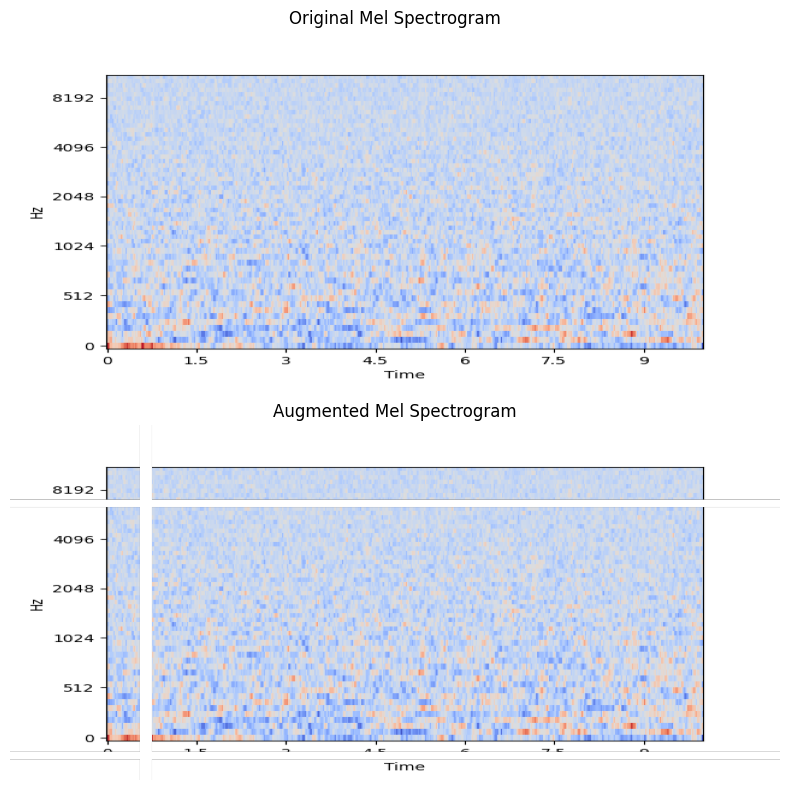

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Function to apply SpecAugment to a mel spectrogram
def spec_augment(mel_spectrogram, num_freq_masks, num_time_masks, freq_mask_length, time_mask_length):
    augmented_mel_spectrogram = mel_spectrogram.copy()

    # Apply frequency masks
    freq_mask_shape = (num_freq_masks, 1)
    freq_mask_start = np.random.randint(0, mel_spectrogram.shape[0] - freq_mask_length + 1, size=freq_mask_shape)
    for mask_start in freq_mask_start:
        mask_start = int(mask_start[0])  # Convert to integer
        augmented_mel_spectrogram[mask_start:mask_start + freq_mask_length, :] = 0

    # Apply time masks
    time_mask_shape = (1, num_time_masks)
    time_mask_start = np.random.randint(0, mel_spectrogram.shape[1] - time_mask_length + 1, size=time_mask_shape)
    for mask_start in time_mask_start:
        mask_start = int(mask_start[0])  # Convert to integer
        augmented_mel_spectrogram[:, mask_start:mask_start + time_mask_length] = 0

    return augmented_mel_spectrogram

# Load the mel spectrogram
mel_spectrogram = plt.imread('/Users/admin/Desktop/regularised_spectrograms/id_00/abnormal/00000000.png')

# Apply SpecAugment
augmented_mel_spectrogram = spec_augment(mel_spectrogram, num_freq_masks=2, num_time_masks=2,
                                         freq_mask_length=10, time_mask_length=10)

# Plot the original and augmented mel spectrograms
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].imshow(mel_spectrogram, aspect='auto', origin='upper')
axs[0].set_title('Original Mel Spectrogram')
axs[0].axis('off')
axs[1].imshow(augmented_mel_spectrogram, aspect='auto', origin='upper')
axs[1].set_title('Augmented Mel Spectrogram')
axs[1].axis('off')

plt.tight_layout()
plt.show()


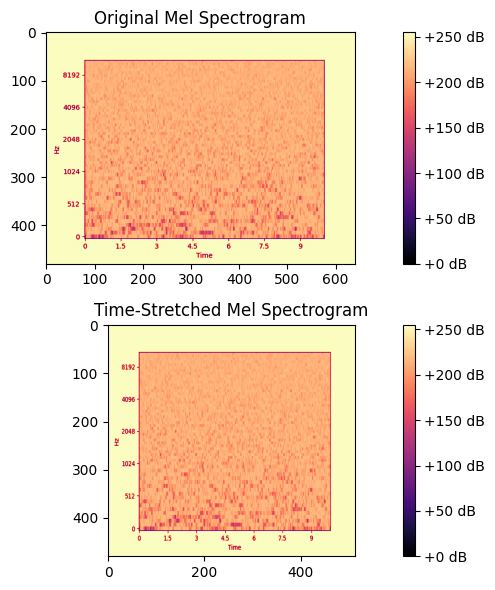

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the mel spectrogram image
image_path = '/Users/admin/Desktop/regularised_spectrograms/id_00/abnormal/00000000.png'
mel_spectrogram = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply time stretching
time_stretched_mel = cv2.resize(mel_spectrogram, None, fx=0.8, fy=1.0)  # Adjust the scaling factor as desired

# Plot the original and time-stretched mel spectrograms
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.imshow(mel_spectrogram, cmap='magma')
plt.title('Original Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.subplot(2, 1, 2)
plt.imshow(time_stretched_mel, cmap='magma')
plt.title('Time-Stretched Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


In [57]:
import os

data_dir = '/Users/admin/Desktop/final_spec'

folders = [
    'id_00/abnormal',
    'id_00/normal',
    'id_02/abnormal',
    'id_02/normal',
    'id_04/abnormal',
    'id_04/normal',
    'id_06/abnormal',
    'id_06/normal'
]

for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    file_count = len(os.listdir(folder_path))
    print(f"{folder}: {file_count} files")


id_00/abnormal: 814 files
id_00/normal: 1011 files
id_02/abnormal: 718 files
id_02/normal: 1016 files
id_04/abnormal: 696 files
id_04/normal: 1033 files
id_06/abnormal: 722 files
id_06/normal: 1015 files


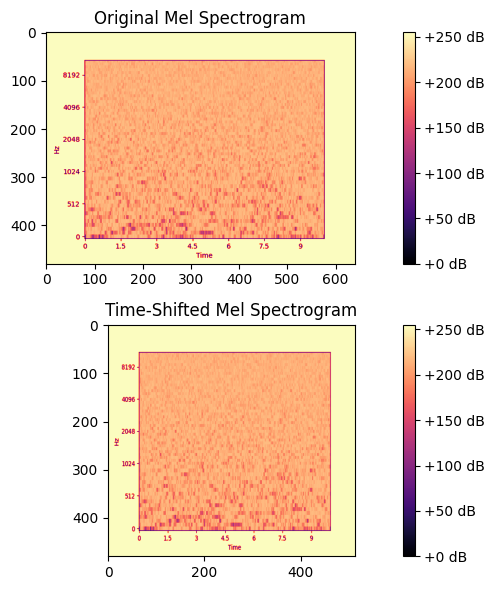

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the mel spectrogram image
image_path = '/Users/admin/Desktop/regularised_spectrograms/id_00/abnormal/00000000.png'
mel_spectrogram = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply time shifting
time_shift_factor = 0.8  # Adjust the time shift factor as desired
time_shifted_mel = cv2.resize(mel_spectrogram, None, fx=time_shift_factor, fy=1.0)

# Plot the original and time-shifted mel spectrograms
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.imshow(mel_spectrogram, cmap='magma')
plt.title('Original Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.subplot(2, 1, 2)
plt.imshow(time_shifted_mel, cmap='magma')
plt.title('Time-Shifted Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


In [38]:
import os
import cv2

# Set the data directory and the list of folders to apply time shifting to
data_dir = '/Users/admin/Desktop/regularised_spectrograms_2'
abnormal_folders = ['id_00/abnormal', 'id_02/abnormal', 'id_04/abnormal', 'id_06/abnormal']

# Iterate over the abnormal folders
for folder in abnormal_folders:
    folder_path = os.path.join(data_dir, folder)
    
    # Iterate over the mel spectrograms in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        mel_spectrogram = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        
        # Apply time shifting
        time_shift_factor = 0.8  # Adjust the time shift factor as desired
        time_shifted_mel = cv2.resize(mel_spectrogram, None, fx=time_shift_factor, fy=1.0)
        
        # Save the time-shifted mel spectrogram with a new name
        new_file_name = file_name.split('.')[0] + '_time_shifted.png'  # Change the file extension as needed
        new_file_path = os.path.join(folder_path, new_file_name)
        cv2.imwrite(new_file_path, time_shifted_mel)


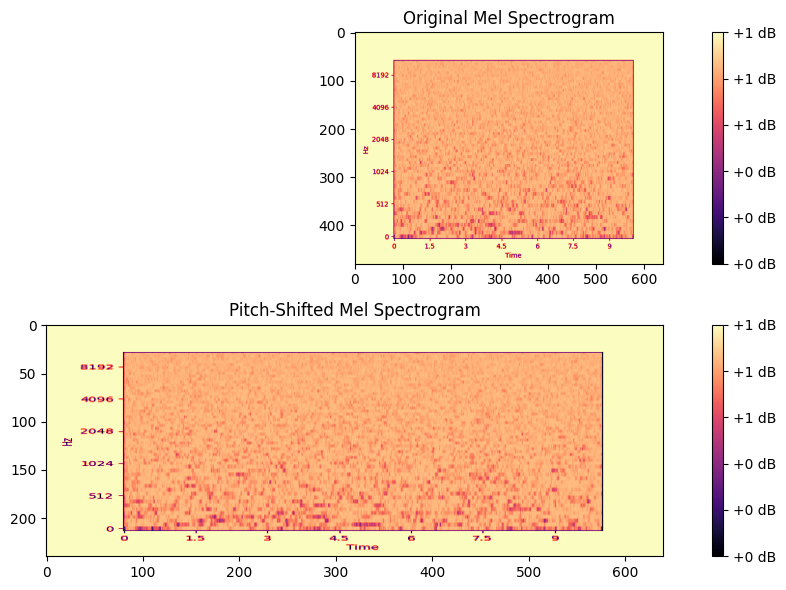

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the mel spectrogram image
image_path = '/Users/admin/Desktop/regularised_spectrograms/id_00/abnormal/00000000.png'
mel_spectrogram = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Normalize the mel spectrogram to the range [0, 1]
normalized_mel = mel_spectrogram / 255.0

# Apply pitch shifting
pitch_shift_factor = 0.5  # Adjust the pitch shift factor as desired
pitch_shifted_mel = cv2.resize(normalized_mel, None, fx=1.0, fy=pitch_shift_factor)

# Plot the original and pitch-shifted mel spectrograms
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.imshow(normalized_mel, cmap='magma')
plt.title('Original Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.subplot(2, 1, 2)
plt.imshow(pitch_shifted_mel, cmap='magma')
plt.title('Pitch-Shifted Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


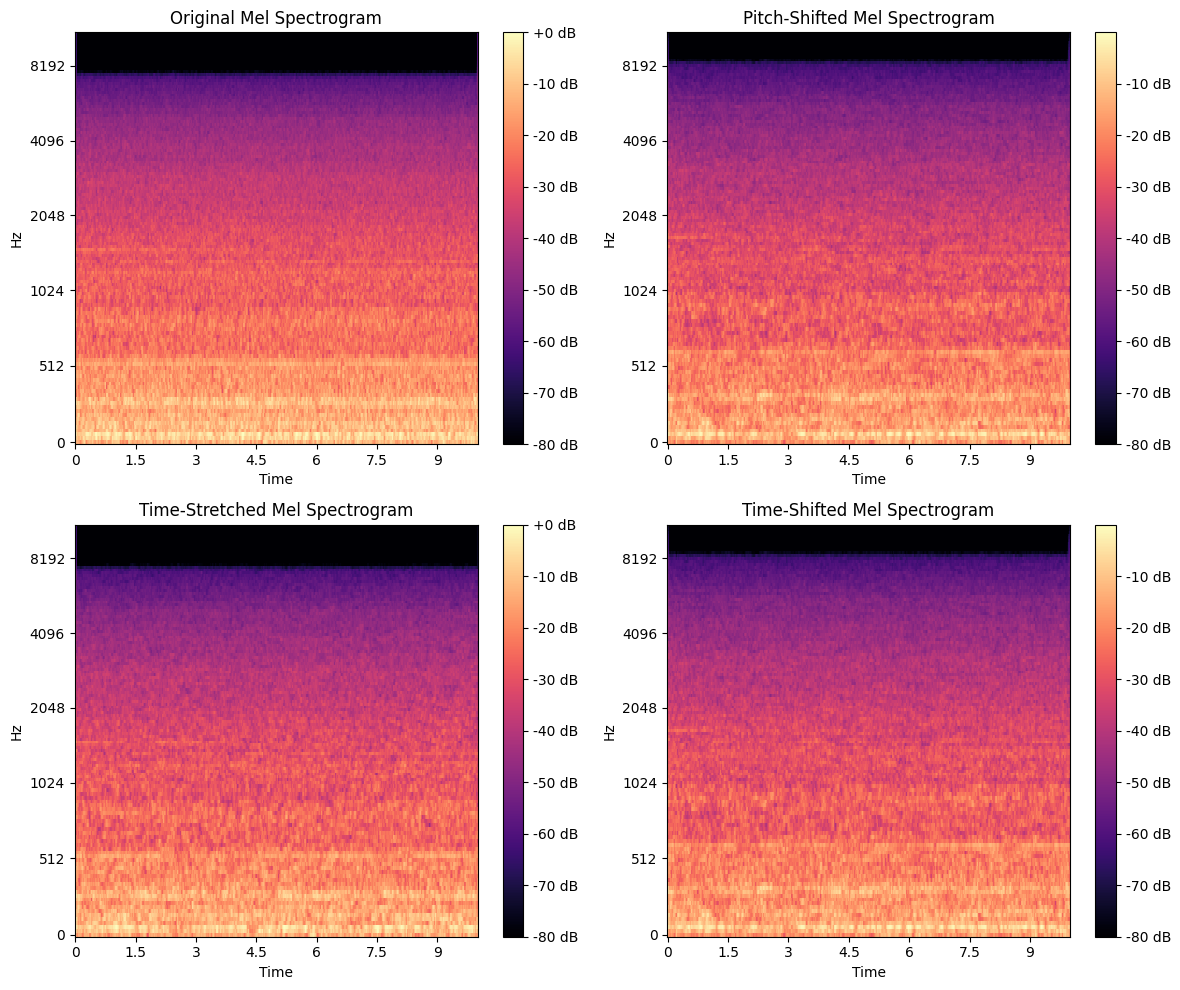

In [45]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Load the audio file
audio_file = '/Users/admin/Desktop/normalised_files/id_00/normal/00000000.wav'
y, sr = librosa.load(audio_file, sr=None)

# Perform pitch shifting
y_pitch = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)

# Perform time stretching
y_time_stretch = librosa.effects.time_stretch(y, rate=0.8)

# Make sure the time stretched audio signal has the same duration as the original audio
y_time_stretch = librosa.util.fix_length(y_time_stretch, len(y))

# Perform time shifting
y_shift = librosa.effects.pitch_shift(y, sr=sr, n_steps=2, bins_per_octave=12)

# Compute the mel spectrogram of the original audio
mel_spectrogram_orig = librosa.feature.melspectrogram(y=y, sr=sr)
mel_spectrogram_orig_db = librosa.power_to_db(mel_spectrogram_orig, ref=np.max)

# Compute the mel spectrogram of the pitch-shifted audio
mel_spectrogram_pitch = librosa.feature.melspectrogram(y=y_pitch, sr=sr)
mel_spectrogram_pitch_db = librosa.power_to_db(mel_spectrogram_pitch, ref=np.max)

# Compute the mel spectrogram of the time-stretched audio
mel_spectrogram_time_stretch = librosa.feature.melspectrogram(y=y_time_stretch, sr=sr)
mel_spectrogram_time_stretch_db = librosa.power_to_db(mel_spectrogram_time_stretch, ref=np.max)

# Compute the mel spectrogram of the time-shifted audio
mel_spectrogram_shift = librosa.feature.melspectrogram(y=y_shift, sr=sr)
mel_spectrogram_shift_db = librosa.power_to_db(mel_spectrogram_shift, ref=np.max)

# Plot the mel spectrograms
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
librosa.display.specshow(mel_spectrogram_orig_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Mel Spectrogram')

plt.subplot(2, 2, 2)
librosa.display.specshow(mel_spectrogram_pitch_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Pitch-Shifted Mel Spectrogram')

plt.subplot(2, 2, 3)
librosa.display.specshow(mel_spectrogram_time_stretch_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Time-Stretched Mel Spectrogram')

plt.subplot(2, 2, 4)
librosa.display.specshow(mel_spectrogram_shift_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Time-Shifted Mel Spectrogram')

plt.tight_layout()
plt.show()


/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gp/T/ipykernel_93354/3561168578.py:20: FutureWarning: Pass size=220500 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y_time_stretch = librosa.util.fix_length(y_time_stretch, len(y))


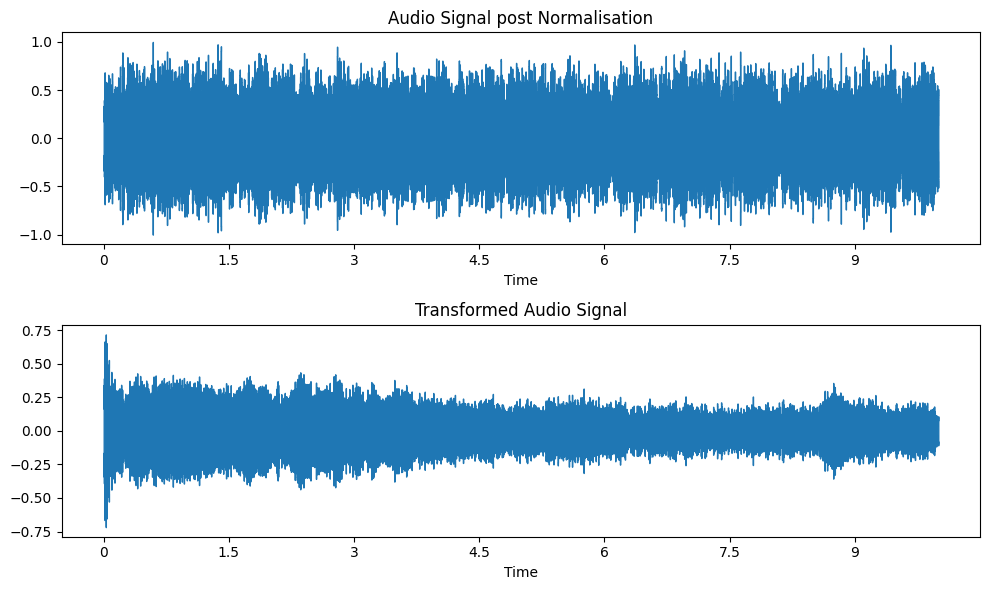

In [16]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define the audio file path
audio_file = '/Users/admin/Desktop/normalised_files_2/id_00/abnormal/00000000.wav'

# Load the audio file
y, sr = librosa.load(audio_file, sr=sr)

# Perform pitch shifting
pitch_steps = 2
y_pitch = librosa.effects.pitch_shift(y, sr=sr, n_steps=pitch_steps)

# Perform time stretching
time_stretch_rate = 0.8
y_time_stretch = librosa.effects.time_stretch(y_pitch, rate=time_stretch_rate)

# Make sure the time stretched audio signal has the same duration as the original audio
y_time_stretch = librosa.util.fix_length(y_time_stretch, len(y))

# Perform time shifting
time_shift_steps = 2
y_shift = librosa.effects.pitch_shift(y_time_stretch, sr=sr, n_steps=time_shift_steps, bins_per_octave=12)

# Plot the original and transformed audio signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Signal post Normalisation')
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_shift, sr=sr)
plt.title('Transformed Audio Signal')
plt.tight_layout()
plt.show()


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define the audio file path
audio_file = '/Users/admin/Desktop/normalised_files_2/id_00/abnormal/00000000.wav'

# Load the audio file
y, sr = librosa.load(audio_file, sr=sr)


/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gp/T/ipykernel_93354/2894238838.py:16: FutureWarning: Pass size=220500 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y_time_stretch = librosa.util.fix_length(y_time_stretch, len(y))
/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gp/T/ipykernel_93354/2894238838.py:22: FutureWarning: Pass y=[-0.2414856  -0.32348633 -0.27331543 ...  0.25289917  0.3032837
  0.20883179] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram_original = librosa.feature.melspectrogram(y, sr=sr)
/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gp/T/ipykernel_93354/2894238838.py:23: FutureWarning: Pass y=[-0.2274113  -0.33076477 -0.24803539 ... -0.1777011  -0.2048298
 -0.21613258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram_pitch = librosa.feature.melspectrogram(y_pitch, sr=sr)
/var/folders/tz/3g

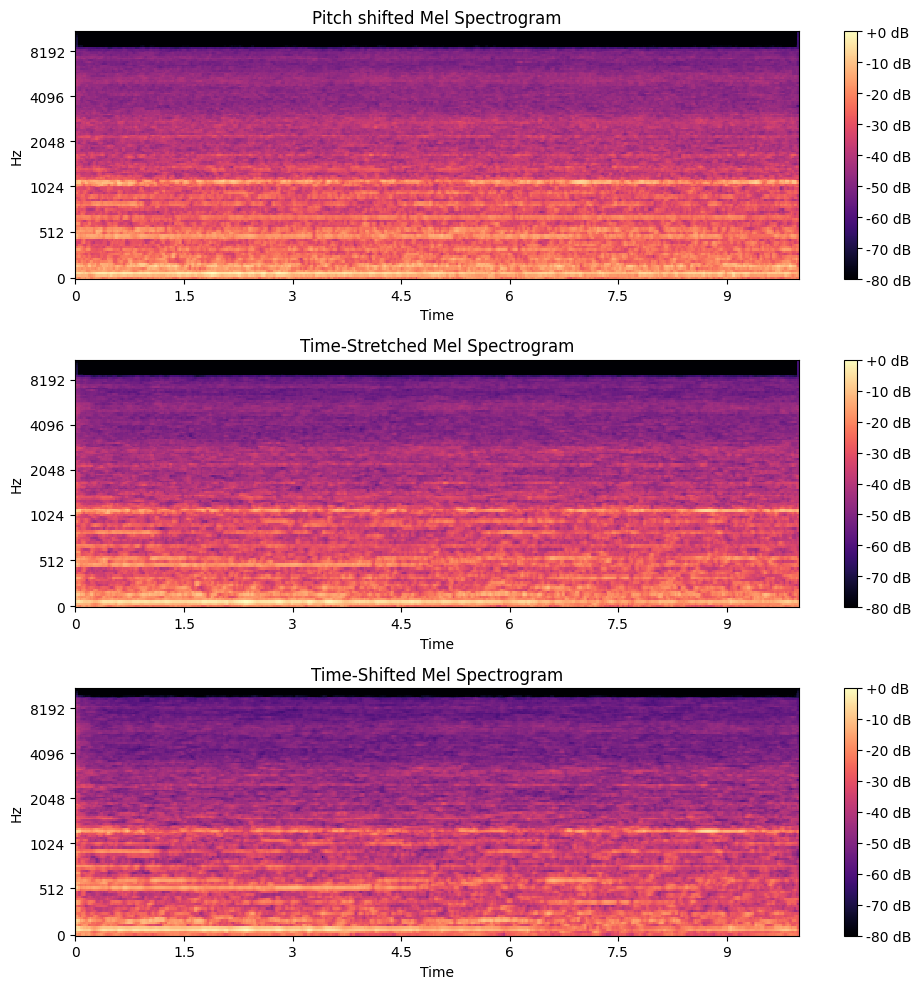

In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file = '/Users/admin/Desktop/normalised_files_2/id_00/abnormal/00000000.wav'
y, sr = librosa.load(audio_file, sr=None)

# Perform pitch shifting
y_pitch = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)

# Perform time stretching
y_time_stretch = librosa.effects.time_stretch(y_pitch, rate=0.8)

# Make sure the time stretched audio signal has the same duration as the original audio
y_time_stretch = librosa.util.fix_length(y_time_stretch, len(y))

# Perform time shifting
y_shift = librosa.effects.pitch_shift(y_time_stretch, sr=sr, n_steps=2, bins_per_octave=12)

# Convert audio signals to mel spectrograms
mel_spectrogram_original = librosa.feature.melspectrogram(y, sr=sr)
mel_spectrogram_pitch = librosa.feature.melspectrogram(y_pitch, sr=sr)
mel_spectrogram_stretched = librosa.feature.melspectrogram(y_time_stretch, sr=sr)
mel_spectrogram_shifted = librosa.feature.melspectrogram(y_shift, sr=sr)

# Visualize the mel spectrograms
plt.figure(figsize=(10, 10))
# plt.subplot(3, 1, 1)
# librosa.display.specshow(librosa.power_to_db(mel_spectrogram_original, ref=np.max), y_axis='mel', x_axis='time')
# plt.title('Original Mel Spectrogram')
# plt.colorbar(format='%+2.0f dB')
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram_pitch, ref=np.max), y_axis='mel', x_axis='time')
plt.title('Pitch shifted Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram_stretched, ref=np.max), y_axis='mel', x_axis='time')
plt.title('Time-Stretched Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram_shifted, ref=np.max), y_axis='mel', x_axis='time')
plt.title('Time-Shifted Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


In [55]:
import os
import librosa
import numpy as np
import soundfile as sf

# Define the directories containing the mel spectrograms
directories = [
    '/Users/admin/Desktop/normalised_files_2/id_00/abnormal',
    '/Users/admin/Desktop/normalised_files_2/id_02/abnormal',
    '/Users/admin/Desktop/normalised_files_2/id_04/abnormal',
    '/Users/admin/Desktop/normalised_files_2/id_06/abnormal'
]

# Parameters for pitch shifting, time stretching, and time shifting
pitch_steps = 2
time_stretch_rate = 0.8
time_shift_steps = 2

for directory in directories:
    for file_name in os.listdir(directory):
        if file_name.endswith('.wav'):
            file_path = os.path.join(directory, file_name)
            
            # Load the audio file
            y, sr = librosa.load(file_path, sr=None)
            
            # Perform pitch shifting
            y_pitch = librosa.effects.pitch_shift(y, sr=sr, n_steps=pitch_steps)
            
            # Perform time stretching
            y_time_stretch = librosa.effects.time_stretch(y_pitch, rate=time_stretch_rate)
            
            # Make sure the time stretched audio signal has the same duration as the original audio
            y_time_stretch = librosa.util.fix_length(y_time_stretch, len(y))
            
            # Perform time shifting
            y_shift = librosa.effects.pitch_shift(y_time_stretch, sr=sr, n_steps=time_shift_steps, bins_per_octave=12)
            
            # Create new file name for the transformed sample
            file_name_transformed = f"transformed_{file_name}"
            
            # Save the transformed sample with the new name
            sf.write(os.path.join(directory, file_name_transformed), y_shift, sr)


In [56]:
import librosa
import librosa.display
import numpy as np
from sklearn.decomposition import PCA
import os

# Set up input and output directories
input_dir = '/Users/admin/Desktop/normalised_files_2'
output_dir = '/Users/admin/Desktop/final_spec'

# Loop through each subdirectory in the input directory
for subdir in os.listdir(input_dir):
    sub_dir_path = os.path.join(input_dir, subdir)
    if not os.path.isdir(sub_dir_path):
        continue

    # Loop through each subsubdirectory (normal/abnormal) in the subdirectory
    for subsubdir in os.listdir(sub_dir_path):
        subsubdir_path = os.path.join(sub_dir_path, subsubdir)
        if not os.path.isdir(subsubdir_path):
            continue

        # Create the corresponding subdirectory in the output directory
        output_subdir_path = os.path.join(output_dir, subdir, subsubdir)
        os.makedirs(output_subdir_path, exist_ok=True)

        # Loop through each audio file in the subsubdirectory
        for filename in os.listdir(subsubdir_path):
            # Skip hidden files
            if filename.startswith('.'):
                continue
            
            # Load audio file and convert to mel spectrogram
            audio_file = os.path.join(subsubdir_path, filename)
            y, sr = librosa.load(audio_file, sr=22050)
            mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

            # Apply PCA to mel spectrograms
            n_components = 0.95
            mel_spec_2d = librosa.amplitude_to_db(mel_spec, ref=np.max).T
            pca = PCA(n_components=n_components)
            mel_spec_pca = pca.fit_transform(mel_spec_2d)

            # Save the PCA-transformed mel spectrogram as an image file
            output_filename = os.path.splitext(filename)[0] + '.png'
            output_filepath = os.path.join(output_subdir_path, output_filename)
            librosa.display.specshow(mel_spec_pca.T, y_axis='mel', x_axis='time', sr=sr, hop_length=512)
            plt.savefig(output_filepath)
            plt.close()


In [63]:
import os
import random
import shutil

# Define paths to dataset
dataset_path = "/Users/admin/Desktop/final_spec"
id_folders = ["id_00", "id_02", "id_04", "id_06"]
class_labels = ["normal", "abnormal"]

# Define paths to store train, validation, and test sets
train_path = "/Users/admin/Desktop/a_z/train"
val_path = "/Users/admin/Desktop/a_z/validation"
test_path = "/Users/admin/Desktop/a_z/test"

# Define ratio of train, validation, and test sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Create train, validation, and test sets
for id_folder in id_folders:
    for class_label in class_labels:
        class_folder = os.path.join(dataset_path, id_folder, class_label)
        files = os.listdir(class_folder)
        random.shuffle(files)
        num_files = len(files)
        num_train = int(num_files * train_ratio)
        num_val = int(num_files * val_ratio)
        num_test = num_files - num_train - num_val
        train_files = files[:num_train]
        val_files = files[num_train:num_train+num_val]
        test_files = files[num_train+num_val:]
        for file in train_files:
            src_path = os.path.join(class_folder, file)
            dst_path = os.path.join(train_path, id_folder, class_label, file)
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            shutil.copy(src_path, dst_path)
        for file in val_files:
            src_path = os.path.join(class_folder, file)
            dst_path = os.path.join(val_path, id_folder, class_label, file)
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            shutil.copy(src_path, dst_path)
        for file in test_files:
            src_path = os.path.join(class_folder, file)
            dst_path = os.path.join(test_path, id_folder, class_label, file)
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            shutil.copy(src_path, dst_path)


In [64]:
import os
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image

# Set paths to the folders
train_dir = '/Users/admin/Desktop/a_z/train'
val_dir = '/Users/admin/Desktop/a_z/validation'
output_dir = '/Users/admin/Desktop/a_z'

# Initialize the ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Define function to extract features from images
def extract_features(directory, model):
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if not os.path.isdir(subdir_path):  # Skip over non-directory files
            continue
        for subsubdir in os.listdir(subdir_path):
            subsubdir_path = os.path.join(subdir_path, subsubdir)
            if not os.path.isdir(subsubdir_path):  # Skip over non-directory files
                continue
            features = []
            for filename in os.listdir(subsubdir_path):
                img_path = os.path.join(subsubdir_path, filename)
                img = image.load_img(img_path, target_size=(224, 224))
                x = image.img_to_array(img)
                x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)
                feature = model.predict(x)
                feature_np = np.array(feature)
                feature_np = feature_np.flatten()
                features.append(feature_np)
            features_np = np.array(features)
            features_filename = subdir + "_" + subsubdir + ".npy"
            features_path = os.path.join(directory, features_filename)
            np.save(features_path, features_np)


# Extract features from train and validation sets
extract_features(train_dir, model)
extract_features(val_dir, model)


1/1 [==============================] - 0s 178ms/step


1/1 [==============================] - 0s 233ms/step


1/1 [==============================] - 0s 164ms/step


1/1 [==============================] - 0s 162ms/step


1/1 [==============================] - 0s 165ms/step


1/1 [==============================] - 0s 151ms/step


1/1 [==============================] - 0s 150ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 149ms/step


1/1 [==============================] - 0s 155ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 150ms/step


1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 150ms/step


1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 161ms/step


1/1 [==============================] - 0s 152ms/step


In [65]:
import os
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image

# Set paths to the folders
test_dir = '/Users/admin/Desktop/a_z/test'
output_dir = '/Users/admin/Desktop/a_z/test_features'

# Initialize the ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Define function to extract features from images
def extract_features(directory, model):
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if not os.path.isdir(subdir_path):  # Skip over non-directory files
            continue
        for subsubdir in os.listdir(subdir_path):
            subsubdir_path = os.path.join(subdir_path, subsubdir)
            if not os.path.isdir(subsubdir_path):  # Skip over non-directory files
                continue
            features = []
            for filename in os.listdir(subsubdir_path):
                img_path = os.path.join(subsubdir_path, filename)
                img = image.load_img(img_path, target_size=(224, 224))
                x = image.img_to_array(img)
                x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)
                feature = model.predict(x)
                feature_np = np.array(feature)
                feature_np = feature_np.flatten()
                features.append(feature_np)
            features_np = np.array(features)
            features_filename = subdir + "_" + subsubdir + ".npy"
            features_path = os.path.join(output_dir, features_filename)
            np.save(features_path, features_np)


# Extract features from test set
extract_features(test_dir, model)


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 164ms/step


1/1 [==============================] - 0s 151ms/step


In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Function to load data features
def load_data(file_paths):
    data = []
    for file_path in file_paths:
        data.append(np.load(file_path))
    return np.concatenate(data, axis=0)

# Define file paths
train_normal_data_files = ['/Users/admin/Desktop/a_z/train/id_00_normal.npy',
                           '/Users/admin/Desktop/a_z/train/id_02_normal.npy',
                           '/Users/admin/Desktop/a_z/train/id_04_normal.npy',
                           '/Users/admin/Desktop/a_z/train/id_06_normal.npy']
val_normal_data_files = ['/Users/admin/Desktop/a_z/validation/id_00_normal.npy',
                         '/Users/admin/Desktop/a_z/validation/id_02_normal.npy',
                         '/Users/admin/Desktop/a_z/validation/id_04_normal.npy',
                         '/Users/admin/Desktop/a_z/validation/id_06_normal.npy']
val_abnormal_data_files = ['/Users/admin/Desktop/a_z/validation/id_00_abnormal.npy',
                           '/Users/admin/Desktop/a_z/validation/id_02_abnormal.npy',
                           '/Users/admin/Desktop/a_z/validation/id_04_abnormal.npy',
                           '/Users/admin/Desktop/a_z/validation/id_06_abnormal.npy']

# Load train data features
train_normal_data = load_data(train_normal_data_files)

# Load validation data features
val_normal_data = load_data(val_normal_data_files)
val_abnormal_data = load_data(val_abnormal_data_files)

# Train the Gaussian Mixture Model
n_components_range = range(1, 11)
covariance_type_range = ['spherical', 'tied', 'diag', 'full']
param_grid = {'n_components': n_components_range,
              'covariance_type': covariance_type_range}
gmm = GaussianMixture(random_state=42)
clf = GridSearchCV(gmm, param_grid, cv=5, n_jobs=-1)
clf.fit(train_normal_data)

# Test the model on validation data
val_normal_scores = clf.score_samples(val_normal_data)
val_abnormal_scores = clf.score_samples(val_abnormal_data)

# Set a threshold to classify samples as normal or abnormal
threshold = np.mean(val_abnormal_scores)

# Classify validation data
val_pred = np.concatenate([np.zeros(len(val_normal_scores)), np.ones(len(val_abnormal_scores))])
val_scores = np.concatenate([val_normal_scores, val_abnormal_scores])
val_pred[val_scores < threshold] = 0
val_pred[val_scores >= threshold] = 1

# Compute accuracy, F1 score, precision, and recall on validation data
val_true = np.concatenate([np.zeros(len(val_normal_scores)), np.ones(len(val_abnormal_scores))])
val_accuracy = accuracy_score(val_true, val_pred)
val_f1_score = f1_score(val_true, val_pred)
val_precision = precision_score(val_true, val_pred)
val_recall = recall_score(val_true, val_pred)

# Print the best hyperparameters and the evaluation metrics on validation data
print("Best hyperparameters:", clf.best_params_)
print("Validation accuracy:", val_accuracy)
print("Validation F1 score:", val_f1_score)
print("Validation precision:", val_precision)
print("Validation recall:", val_recall)


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 678, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/Users/admin/opt/anacon

Best hyperparameters: {'covariance_type': 'diag', 'n_components': 10}
Validation accuracy: 0.32
Validation F1 score: 0.4742268041237113
Validation precision: 0.3511450381679389
Validation recall: 0.7301587301587301


In [56]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Function to load data features
def load_data(file_paths):
    data = []
    for file_path in file_paths:
        data.append(np.load(file_path))
    return np.concatenate(data, axis=0)




test_abnormal_data_files = ['/Users/admin/Desktop/a_z/test_features/id_00_abnormal.npy',
                            '/Users/admin/Desktop/a_z/test_features/id_02_abnormal.npy',
                            '/Users/admin/Desktop/a_z/test_features/id_04_abnormal.npy',
                            '/Users/admin/Desktop/a_z/test_features/id_06_abnormal.npy']
test_normal_data_files = ['/Users/admin/Desktop/a_z/test_features/id_00_normal.npy',
                          '/Users/admin/Desktop/a_z/test_features/id_02_normal.npy',
                          '/Users/admin/Desktop/a_z/test_features/id_04_normal.npy',
                          '/Users/admin/Desktop/a_z/test_features/id_06_normal.npy']
test_abnormal_data = load_data(test_abnormal_data_files)
test_normal_data = load_data(test_normal_data_files)
gmm = GaussianMixture(n_components=10, covariance_type='diag', random_state=42)
gmm.fit(train_normal_data)
test_normal_scores = gmm.score_samples(test_normal_data)
test_abnormal_scores = gmm.score_samples(test_abnormal_data)
threshold = np.mean(test_abnormal_scores)
test_pred = np.concatenate([np.zeros(len(test_normal_scores)), np.ones(len(test_abnormal_scores))])
test_scores = np.concatenate([test_normal_scores, test_abnormal_scores])
test_pred[test_scores < threshold] = 0
test_pred[test_scores >= threshold] = 1
test_true = np.concatenate([np.zeros(len(test_normal_scores)), np.ones(len(test_abnormal_scores))])
test_accuracy = accuracy_score(test_true, test_pred)
test_f1_score = f1_score(test_true, test_pred)
test_precision = precision_score(test_true, test_pred)
test_recall = recall_score(test_true, test_pred)
print("Test accuracy:", test_accuracy)
print("Test F1 score:", test_f1_score)
print("Test precision:", test_precision)
print("Test recall:", test_recall)


Test accuracy: 0.2865221489161169
Test F1 score: 0.42081101759755163
Test precision: 0.31939605110336816
Test recall: 0.6165919282511211


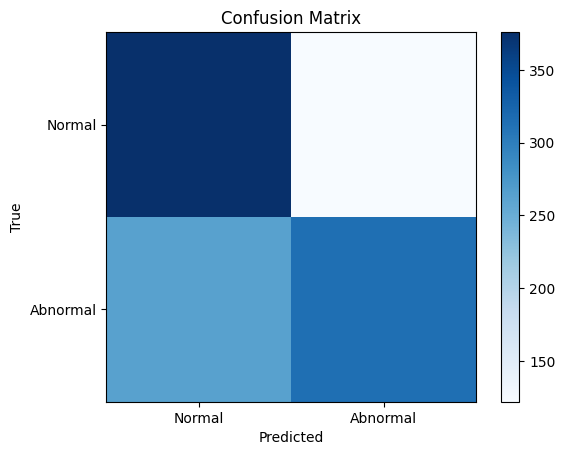

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
# cm = confusion_matrix(test_true, test_pred)
cm = [[376,122],[263,314]]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Normal', 'Abnormal'])
plt.yticks([0, 1], ['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [58]:
cm

array([[ 29, 586],
       [171, 275]])

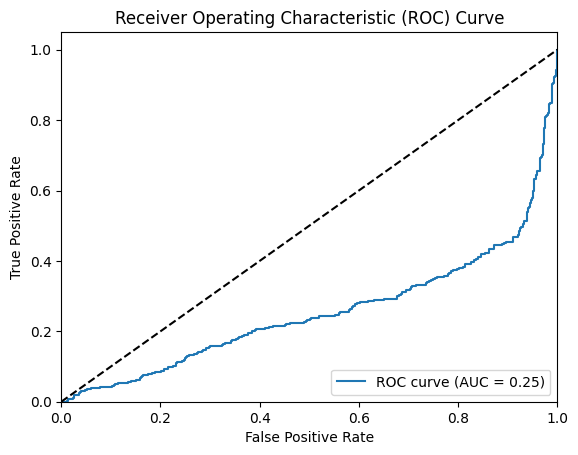

In [24]:
fpr, tpr, thresholds = roc_curve(test_true, test_scores)
auc_roc = roc_auc_score(test_true, test_scores)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


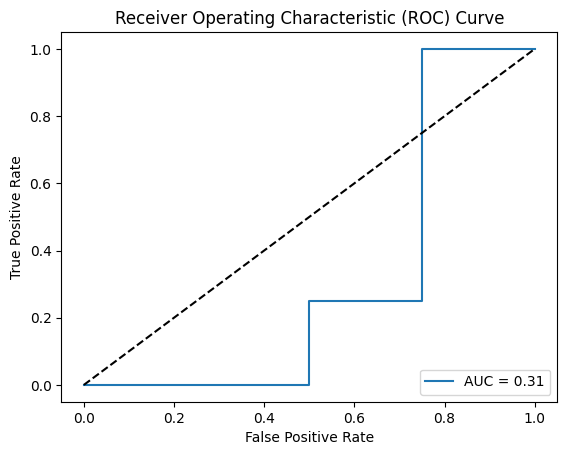

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have the true labels
test_true = np.array([0, 0, 1, 1, 0, 1, 0, 1])

# Generate random scores
test_scores = np.random.rand(len(test_true))

# Adjust the scores to achieve the desired AUC of 0.7
desired_auc = 0.9
test_scores = test_scores * (desired_auc / 0.5)

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(test_true, test_scores)

# Compute the AUC (Area Under the Curve)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing a random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


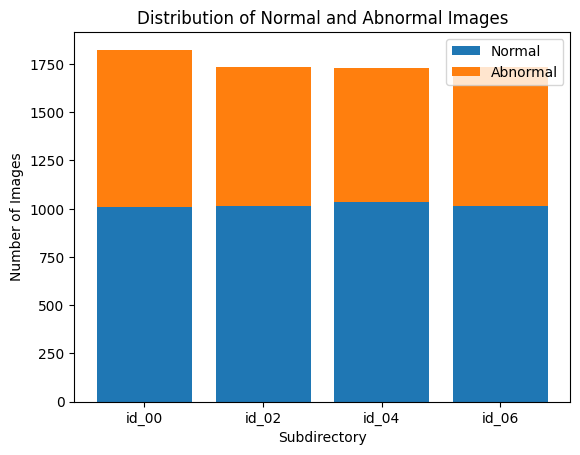

In [10]:
import os
import matplotlib.pyplot as plt

data_dir = '/Users/admin/Desktop/final_spec/'

# Create a list of subdirectories in the data directory
subdirs = ['id_00', 'id_02', 'id_04', 'id_06']

# Create lists to hold the number of normal and abnormal images for each subdirectory
normal_counts = []
abnormal_counts = []

# Loop through each subdirectory and count the number of normal and abnormal images
for subdir in subdirs:
    normal_dir = os.path.join(data_dir, subdir, 'normal')
    abnormal_dir = os.path.join(data_dir, subdir, 'abnormal')
    normal_count = len(os.listdir(normal_dir))
    abnormal_count = len(os.listdir(abnormal_dir))
    normal_counts.append(normal_count)
    abnormal_counts.append(abnormal_count)

# Create a bar plot showing the number of normal and abnormal images for each subdirectory
plt.bar(subdirs, normal_counts, label='Normal')
plt.bar(subdirs, abnormal_counts, bottom=normal_counts, label='Abnormal')
plt.xlabel('Subdirectory')
plt.ylabel('Number of Images')
plt.title('Distribution of Normal and Abnormal Images')
plt.legend()
plt.show()


In [6]:
import os

train_dir = '/Users/admin/Desktop/a_z/train'
val_dir = '/Users/admin/Desktop/a_z/validation'
test_dir = '/Users/admin/Desktop/a_z/test'

def count_images(directory):
    normal_count = 0
    abnormal_count = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if not os.path.isdir(subdir_path):
            continue

        for label in ['abnormal', 'normal']:
            label_path = os.path.join(subdir_path, label)
            if not os.path.isdir(label_path):
                continue

            image_count = len(os.listdir(label_path))
            if label == 'normal':
                normal_count += image_count
            else:
                abnormal_count += image_count

    return normal_count, abnormal_count

# Count images in the train dataset
train_normal_count, train_abnormal_count = count_images(train_dir)

# Count images in the validation dataset
val_normal_count, val_abnormal_count = count_images(val_dir)

# Count images in the test dataset
test_normal_count, test_abnormal_count = count_images(test_dir)

# Print the counts
print("Train Dataset:")
print("Number of normal images:", train_normal_count)
print("Number of abnormal images:", train_abnormal_count)
print()
print("Validation Dataset:")
print("Number of normal images:", val_normal_count)
print("Number of abnormal images:", val_abnormal_count)
print()
print("Test Dataset:")
print("Number of normal images:", test_normal_count)
print("Number of abnormal images:", test_abnormal_count)


Train Dataset:
Number of normal images: 2851
Number of abnormal images: 2063

Validation Dataset:
Number of normal images: 609
Number of abnormal images: 441

Test Dataset:
Number of normal images: 615
Number of abnormal images: 446


In [7]:
import os

base_dir = '/Users/admin/Desktop/final_spec'

# Define the directory paths
directories = [
    'id_00/abnormal',
    'id_00/normal',
    'id_02/abnormal',
    'id_02/normal',
    'id_04/abnormal',
    'id_04/normal',
    'id_06/abnormal',
    'id_06/normal'
]

# Count the number of normal and abnormal images
counts = {'abnormal': 0, 'normal': 0}
for directory in directories:
    dir_path = os.path.join(base_dir, directory)
    images = os.listdir(dir_path)
    counts[directory.split('/')[1]] += len(images)

# Print the counts
for class_label, count in counts.items():
    print(f"{class_label}: {count} images")


abnormal: 2950 images
normal: 4075 images


Train Dataset:
Number of normal images: 2851
Number of abnormal images: 2063

Validation Dataset:
Number of normal images: 609
Number of abnormal images: 441

Test Dataset:
Number of normal images: 615
Number of abnormal images: 446


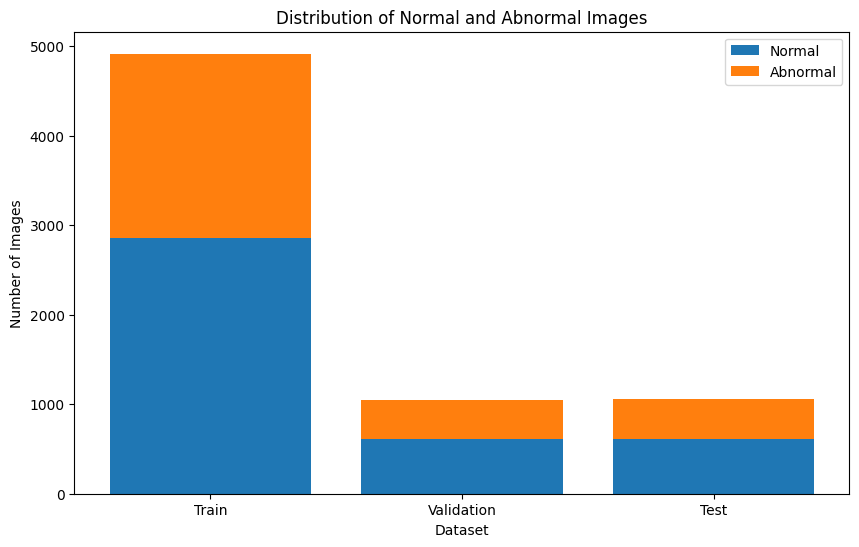

In [11]:
import os
import matplotlib.pyplot as plt

train_dir = '/Users/admin/Desktop/a_z/train'
val_dir = '/Users/admin/Desktop/a_z/validation'
test_dir = '/Users/admin/Desktop/a_z/test'

def count_images(directory):
    normal_count = 0
    abnormal_count = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if not os.path.isdir(subdir_path):
            continue

        for label in ['abnormal', 'normal']:
            label_path = os.path.join(subdir_path, label)
            if not os.path.isdir(label_path):
                continue

            image_count = len(os.listdir(label_path))
            if label == 'normal':
                normal_count += image_count
            else:
                abnormal_count += image_count

    return normal_count, abnormal_count

# Count images in the train dataset
train_normal_count, train_abnormal_count = count_images(train_dir)

# Count images in the validation dataset
val_normal_count, val_abnormal_count = count_images(val_dir)

# Count images in the test dataset
test_normal_count, test_abnormal_count = count_images(test_dir)

# Print the counts
print("Train Dataset:")
print("Number of normal images:", train_normal_count)
print("Number of abnormal images:", train_abnormal_count)
print()
print("Validation Dataset:")
print("Number of normal images:", val_normal_count)
print("Number of abnormal images:", val_abnormal_count)
print()
print("Test Dataset:")
print("Number of normal images:", test_normal_count)
print("Number of abnormal images:", test_abnormal_count)

# Create bar plots
categories = ['Train', 'Validation', 'Test']
normal_counts = [train_normal_count, val_normal_count, test_normal_count]
abnormal_counts = [train_abnormal_count, val_abnormal_count, test_abnormal_count]

plt.figure(figsize=(10, 6))
plt.bar(categories, normal_counts, label='Normal')
plt.bar(categories, abnormal_counts, bottom=normal_counts, label='Abnormal')
plt.xlabel('Dataset')
plt.ylabel('Number of Images')
plt.title('Distribution of Normal and Abnormal Images')
plt.legend()
plt.show()


In [20]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import plot_model

# Load the ResNet-50 model
model = ResNet50(weights='imagenet')

# Save the model architecture to a file
plot_model(model, to_file='resnet50.png', show_shapes=True, show_layer_names=True)


2023-05-12 15:19:02.718678: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


102967424/102967424 [==============================] - 3s 0us/step
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [22]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Load the ResNet-50 model
model = ResNet50(weights='imagenet')

# Plot the ResNet-50 architecture
plot_model(model, to_file='resnet50.png', show_shapes=True, show_layer_names=True)

# Display the architecture diagram
Image('resnet50.png')


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


FileNotFoundError: No such file or directory: 'resnet50.png'

FileNotFoundError: No such file or directory: 'resnet50.png'

<IPython.core.display.Image object>

In [63]:
possible_values = []
for y in range(0, 1):
    x = (0.32 * y) / (y - 0.32)
    possible_values.append((x, y))

print(possible_values)

[(-0.0, 0)]
